In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
# Upload dataset
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Assignment1_StreamFlow_Subscription_Data (1).csv to Assignment1_StreamFlow_Subscription_Data (1).csv


In [ ]:
# Load the dataset
data = pd.read_csv(io.BytesIO(uploaded['Assignment1_StreamFlow_Subscription_Data (1).csv']))

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   User_ID  Age  Gender Location     Subscription_Start_Date  \
0        1   56   Other  Central  2020-06-07 01:53:37.656934   
1        2   69   Other     West  2024-02-21 01:53:37.656980   
2        3   46  Female    North  2022-10-06 01:53:37.656995   
3        4   32  Female     East  2022-01-04 01:53:37.657006   
4        5   60  Female    North  2020-03-13 01:53:37.657017   

  Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0           Premium            19.99    Credit Card              31.513153   
1          Standard            14.99    Credit Card               4.982277   
2          Standard            14.99         PayPal               4.114953   
3          Standard            14.99    Credit Card              60.244820   
4          Standard            14.99    Credit Card               4.711855   

  Favorite_Genre Devices_Used  Average_Session_Length  Content_ID  \
0         Action           PC                1.195762        1023   
1       

In [ ]:
# Checking for and display missing values
missing_values = data.isnull().sum()
print(missing_values)

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [ ]:
# Check data types
data_types = data.dtypes

print("\nData types of each column:")
print(data_types)


Data types of each column:
User_ID                      int64
Age                          int64
Gender                      object
Location                    object
Subscription_Start_Date     object
Subscription_Type           object
Monthly_Payment            float64
Payment_Method              object
Monthly_Hours_Watched      float64
Favorite_Genre              object
Devices_Used                object
Average_Session_Length     float64
Content_ID                   int64
Rating_Given                 int64
Churned                      int64
Date_of_Churn               object
Reason_for_Churn            object
dtype: object


In [ ]:
# Convert date columns to datetime
data['Subscription_Start_Date'] = pd.to_datetime(data['Subscription_Start_Date'])
data['Date_of_Churn'] = pd.to_datetime(data['Date_of_Churn'], errors='coerce')

In [ ]:
# Create a new column for subscription duration
data['Subscription_Duration_Days'] = (data['Date_of_Churn'] - data['Subscription_Start_Date']).dt.days

In [ ]:
# For non-churned users, calculate the duration till the current date
current_date = pd.to_datetime("2024-05-28")
data['Subscription_Duration_Days'].fillna((current_date - data['Subscription_Start_Date']).dt.days, inplace=True)

In [ ]:
# Define the age categories
bins = [0, 17, 35, 55, 100]
labels = ['Youth', 'Young Adult', 'Adult', 'Senior']

# Create a new column with age categories
data['Age_Category'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the updated dataset
data.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Duration_Days,Churn_Status,Age_Category
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,1450.0,Not Churned,Senior
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,96.0,Not Churned,Senior
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,599.0,Not Churned,Adult
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,874.0,Not Churned,Young Adult
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,1536.0,Not Churned,Senior


In [ ]:
# Descriptive statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)

           User_ID          Age        Subscription_Start_Date  \
count  1000.000000  1000.000000                           1000   
mean    500.500000    44.385000  2021-09-18 17:08:01.662466560   
min       1.000000    18.000000     2019-05-10 01:53:37.659073   
25%     250.750000    31.750000  2020-05-15 19:53:37.664891136   
50%     500.500000    45.000000  2021-08-21 01:53:37.662536448   
75%     750.250000    57.000000  2023-01-09 07:53:37.664328192   
max    1000.000000    70.000000     2024-05-06 01:53:37.662112   
std     288.819436    15.321669                            NaN   

       Monthly_Payment  Monthly_Hours_Watched  Average_Session_Length  \
count      1000.000000            1000.000000             1000.000000   
mean         14.580000              19.071653                1.893771   
min           9.990000               0.041574                0.000486   
25%           9.990000               5.490739                0.548918   
50%          14.990000              13.3

In [ ]:
# Frequency distribution for categorical columns
categorical_summary = data.describe(include=['object', 'category'])
print(categorical_summary)

       Gender Location Subscription_Type Payment_Method Favorite_Genre  \
count    1000     1000              1000           1000           1000   
unique      3        5                 3              3              5   
top     Other     West          Standard    Credit Card          Drama   
freq      336      216               530            613            212   

       Devices_Used Reason_for_Churn  
count          1000              246  
unique            4                4  
top          Mobile   Price increase  
freq            408               68  


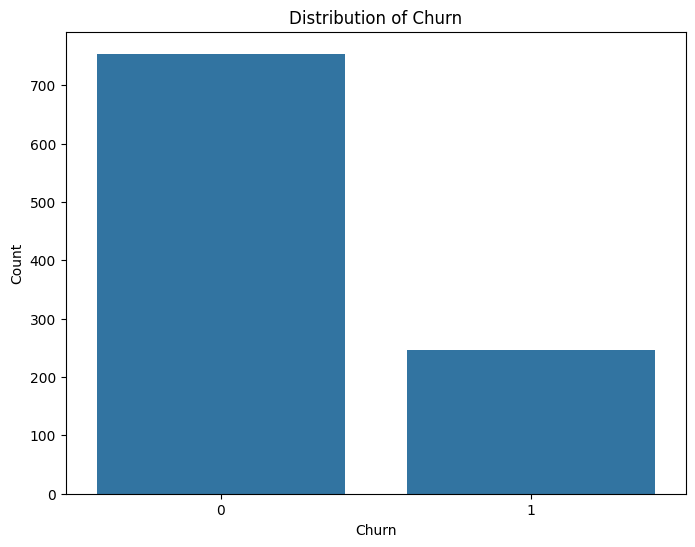

In [ ]:
# Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

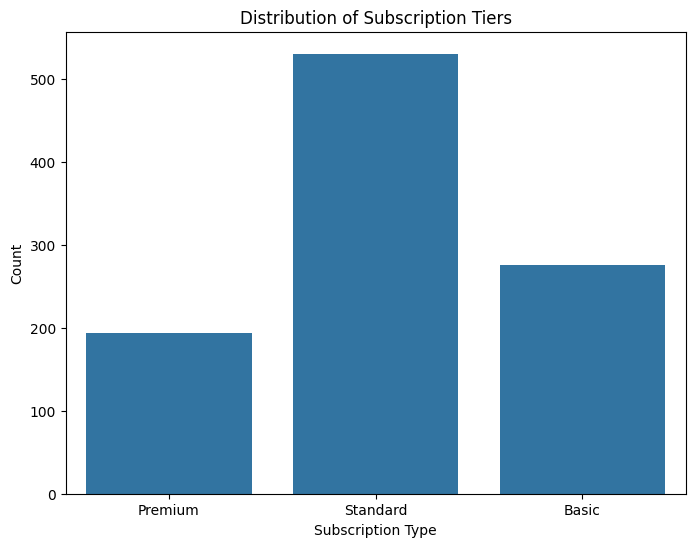

In [ ]:
# Distribution of subscription tiers
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription_Type', data=data)
plt.title('Distribution of Subscription Tiers')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

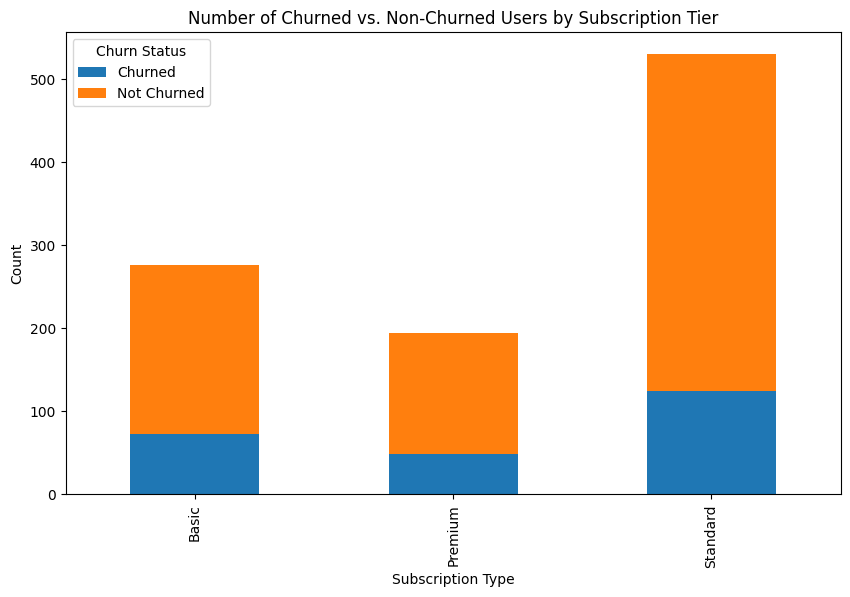

In [ ]:
# Create a new column to label churned and not churned users
data['Churn_Status'] = data['Churned'].apply(lambda x: 'Churned' if x == 1 else 'Not Churned')

# Group by Subscription_Type and Churn_Status to get counts
subscription_churn_counts = data.groupby(['Subscription_Type', 'Churn_Status']).size().unstack().fillna(0)

# Plot the stacked bar chart
subscription_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Set plot title and labels
plt.title('Number of Churned vs. Non-Churned Users by Subscription Tier')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churn Status')

plt.show()

In [ ]:
# Calculate the percentage of people who churn for each subscription type
churn_percentage_by_subscription_type = data.groupby('Subscription_Type')['Churned'].mean() * 100
churn_percentage_by_subscription_type

Subscription_Type
Basic       26.449275
Premium     25.257732
Standard    23.396226
Name: Churned, dtype: float64

In [81]:

# Calculate the total number of churned users
total_churned = data[data['Churned'] == 1].shape[0]

# Calculate the number of churned users for each subscription type
standard_churned = data[(data['Churned'] == 1) & (data['Subscription_Type'] == 'Standard')].shape[0]
premium_churned = data[(data['Churned'] == 1) & (data['Subscription_Type'] == 'Premium')].shape[0]
basic_churned = data[(data['Churned'] == 1) & (data['Subscription_Type'] == 'Basic')].shape[0]

# Calculate the percentage of churned users for each subscription type
standard_churned_percentage = (standard_churned / total_churned) * 100
premium_churned_percentage = (premium_churned / total_churned) * 100
basic_churned_percentage = (basic_churned / total_churned) * 100

# Print the percentages
print(f"Percentage of churned users from Standard tier: {standard_churned_percentage:.2f}%")
print(f"Percentage of churned users from Premium tier: {premium_churned_percentage:.2f}%")
print(f"Percentage of churned users from Basic tier: {basic_churned_percentage:.2f}%")

Percentage of churned users from Standard tier: 50.41%
Percentage of churned users from Premium tier: 19.92%
Percentage of churned users from Basic tier: 29.67%


In [ ]:
# Calculate the percentage of people who churn for each age category in ALL TIERS vs STANDARD
churn_percentage_by_age_category = (data.groupby('Age_Category')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_percentage_by_age_category_standard = (standard_subscription_data.groupby('Age_Category')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
combined_churn_table = pd.concat([churn_percentage_by_age_category, churn_percentage_by_age_category_standard], axis=1)
combined_churn_table.columns = ['All Tiers', 'Standard Tier']
combined_churn_table

,All Tiers,Standard Tier
Age_Category,,
Youth,NaN,NaN
Young Adult,25.816993,26.086957
Adult,24.626866,20.192308
Senior,23.287671,24.844720


In [ ]:
# Calculate the percentage of people who churn for each gender in ALL TIERS vs STANDARD
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_percentage_by_gender_standard = (standard_subscription_data.groupby('Gender')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
combined_churn_table = pd.concat([churn_rate_by_gender, churn_percentage_by_gender_standard], axis=1)
combined_churn_table.columns = ['All Tiers', 'Standard Tier']
combined_churn_table


,All Tiers,Standard Tier
Gender,,
Female,25.757576,26.785714
Male,22.455090,18.435754
Other,25.595238,25.136612


In [ ]:
# Calculate the percentage of people who churn for each location in ALL TIERS vs STANDARD
churn_percentage_by_location = (data.groupby('Location')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_percentage_by_location_standard = (standard_subscription_data.groupby('Location')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
combined_churn_table = pd.concat([churn_percentage_by_location, churn_percentage_by_location_standard], axis=1)
combined_churn_table.columns = ['All Tiers', 'Standard Tier']
combined_churn_table


,All Tiers,Standard Tier
Location,,
Central,23.383085,23.232323
East,30.000000,30.701754
North,25.980392,23.853211
South,23.463687,20.212766
West,20.370370,18.421053


In [ ]:
# Calculate the percentage of people who churn for each payment type in ALL TIERS vs STANDARD
churn_percentage_by_payment_type = (data.groupby('Payment_Method')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_percentage_by_payment_type_standard = (standard_subscription_data.groupby('Payment_Method')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
combined_churn_table = pd.concat([churn_percentage_by_payment_type, churn_percentage_by_payment_type_standard], axis=1)
combined_churn_table.columns = ['All Tiers', 'Standard Tier']
combined_churn_table


,All Tiers,Standard Tier
Payment_Method,,
Credit Card,24.306688,23.006135
Direct Debit,25.257732,26.000000
PayPal,24.870466,22.115385


In [ ]:
# Calculate the percentage of people who churn for each favourite genre in ALL TIERS vs STANDARD
churn_percentage_by_favorite_genre = (data.groupby('Favorite_Genre')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_percentage_by_favorite_genre_standard = (standard_subscription_data.groupby('Favorite_Genre')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
combined_churn_table = pd.concat([churn_percentage_by_favorite_genre, churn_percentage_by_favorite_genre_standard], axis=1)
combined_churn_table.columns = ['All Tiers', 'Standard Tier']
combined_churn_table


,All Tiers,Standard Tier
Favorite_Genre,,
Action,23.902439,21.621622
Comedy,24.137931,24.590164
Documentary,27.659574,27.722772
Drama,22.169811,22.115385
Sci-Fi,25.520833,20.652174


In [ ]:
# Calculate the percentage of people who churn for each device used in ALL TIERS vs STANDARD
churn_percentage_by_device = (data.groupby('Devices_Used')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_percentage_by_device_standard = (standard_subscription_data.groupby('Devices_Used')['Churned'].mean() * 100).to_frame(name='Churn Rate (%)')
combined_churn_table = pd.concat([churn_percentage_by_device, churn_percentage_by_device_standard], axis=1)
combined_churn_table.columns = ['All Tiers', 'Standard Tier']
combined_churn_table


,All Tiers,Standard Tier
Devices_Used,,
Mobile,32.107843,33.488372
PC,15.517241,11.881188
TV,21.890547,19.230769
Tablet,20.276498,18.181818


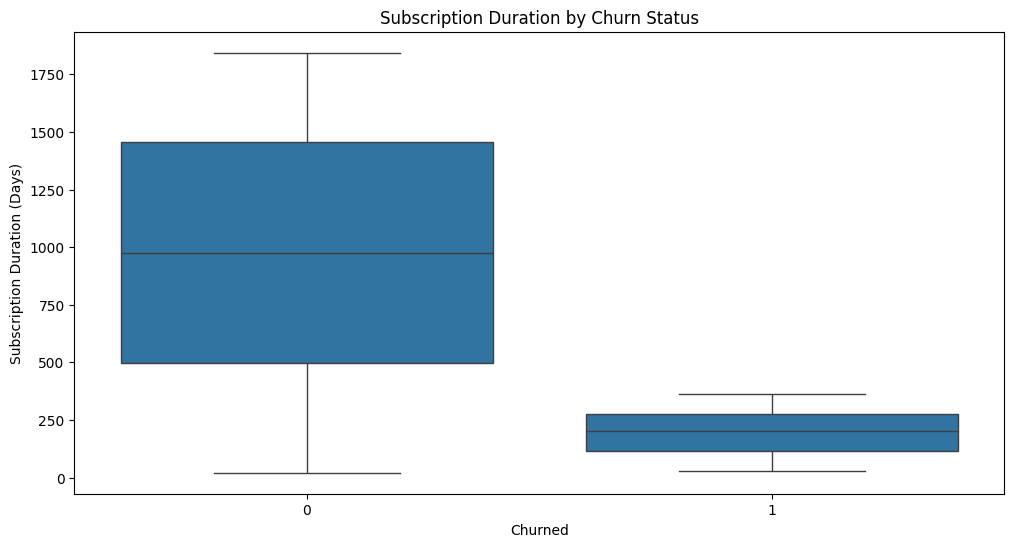

In [ ]:
# Subscription Duration by Churn Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churned', y='Subscription_Duration_Days', data=data)
plt.title('Subscription Duration by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Subscription Duration (Days)')
plt.show()

In [ ]:
# Calculate the average subscription duration for churned users in ALL TIERS vs STANDARD

average_subscription_duration_churned_all_tiers = data[data['Churned'] == 1]['Subscription_Duration_Days'].mean()
average_subscription_duration_churned_standard = data[(data['Churned'] == 1) & (data['Subscription_Type'] == 'Standard')]['Subscription_Duration_Days'].mean()

print("Average subscription duration for churned users in ALL TIERS:", average_subscription_duration_churned_all_tiers)
print("Average subscription duration for churned users in STANDARD:", average_subscription_duration_churned_standard)


Average subscription duration for churned users in ALL TIERS: 195.35772357723576
Average subscription duration for churned users in STANDARD: 197.71774193548387


In [ ]:
# Calculate the frequency of each reason for churn in ALL TIERS vs STANDARD
churn_reasons_all_tiers = data['Reason_for_Churn'].value_counts()
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
churn_reasons_standard = standard_subscription_data['Reason_for_Churn'].value_counts()
combined_churn_reasons = pd.concat([churn_reasons_all_tiers, churn_reasons_standard], axis=1)
combined_churn_reasons.columns = ['All Tiers', 'Standard Tier']
combined_churn_reasons


,All Tiers,Standard Tier
Reason_for_Churn,,
Price increase,68,35
Found better service,64,37
Personal reasons,62,29
Dissatisfied with content,52,23


In [ ]:
# Calculate the average revenue per user (ARPU)
arpu = data['Monthly_Payment'].mean()
arpu

14.580000000000002

In [ ]:

# Calculate the total revenue lost due to churn in ALL TIERS
# Calculate average monthly payment

average_monthly_payment = data['Monthly_Payment'].mean()
print(f"Average monthly payment: {average_monthly_payment}")
total_revenue_lost_all_tiers = data[data['Churned'] == 1]['Subscription_Duration_Days'].sum() * average_monthly_payment
print("Total revenue lost due to churn in ALL TIERS:", total_revenue_lost_all_tiers)

# Calculate the total revenue lost due to churn in STANDARD
standard_subscription_data = data[data['Subscription_Type'] == 'Standard']
total_revenue_lost_standard = standard_subscription_data[standard_subscription_data['Churned'] == 1]['Subscription_Duration_Days'].sum() * 9.99 #Using 9.99 as it is the median subscription price value
print("Total revenue lost due to churn in STANDARD:", total_revenue_lost_standard)

# Calculate the potential revenue increase by reducing churn by 5% in ALL TIERS
potential_revenue_increase_all_tiers = total_revenue_lost_all_tiers * 0.05
print("Potential revenue increase by reducing churn by 5% in ALL TIERS:", potential_revenue_increase_all_tiers)

# Calculate the potential revenue increase by reducing churn by 5% in STANDARD
potential_revenue_increase_standard = total_revenue_lost_standard * 0.05
print("Potential revenue increase by reducing churn by 5% in STANDARD:", potential_revenue_increase_standard)


Average monthly payment: 14.580000000000002
Total revenue lost due to churn in ALL TIERS: 700685.6400000001
Total revenue lost due to churn in STANDARD: 244924.83000000002
Potential revenue increase by reducing churn by 5% in ALL TIERS: 35034.28200000001
Potential revenue increase by reducing churn by 5% in STANDARD: 12246.241500000002
